In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.signal import find_peaks
from scipy.signal import welch
from scipy.stats import entropy

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

 
%matplotlib inline

### Dataset exploration
understanding the data set, import libraries and load the dataset

In [2]:
# Define root directory paths
file_path = "../../combined_data.csv"
df = pd.read_csv(file_path)

In [3]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15858929 entries, 0 to 15858928
Data columns (total 12 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   subject     object
 1   activity    object
 2   trial       object
 3   x_ADXL345   int64 
 4   y_ADXL345   int64 
 5   z_ADXL345   int64 
 6   x_ITG3200   int64 
 7   y_ITG3200   int64 
 8   z_ITG3200   int64 
 9   x_MMA8451Q  int64 
 10  y_MMA8451Q  int64 
 11  z_MMA8451Q  int64 
dtypes: int64(9), object(3)
memory usage: 1.4+ GB


In [4]:
# Display the first few rows
df.head()

,subject,activity,trial,x_ADXL345,y_ADXL345,z_ADXL345,x_ITG3200,y_ITG3200,z_ITG3200,x_MMA8451Q,y_MMA8451Q,z_MMA8451Q
0,SA01,D01,R01,17,-179,-99,-18,-504,-352,76,-697,-279
1,SA01,D01,R01,15,-174,-90,-53,-568,-306,48,-675,-254
2,SA01,D01,R01,1,-176,-81,-84,-613,-271,-2,-668,-221
3,SA01,D01,R01,-10,-180,-77,-104,-647,-227,-34,-697,-175
4,SA01,D01,R01,-21,-191,-63,-128,-675,-191,-74,-741,-133


In [5]:
# No. of rows and columns in the dataset
df.shape

(15858929, 12)

In [6]:
# Statistical measures of columns in the dataset
df.describe()

,x_ADXL345,y_ADXL345,z_ADXL345,x_ITG3200,y_ITG3200,z_ITG3200,x_MMA8451Q,y_MMA8451Q,z_MMA8451Q
count,1.585893e+07,1.585893e+07,1.585893e+07,1.585893e+07,1.585893e+07,1.585893e+07,1.585893e+07,1.585893e+07,1.585893e+07
mean,-1.237190e+00,-1.787412e+02,-2.772492e+01,-9.714189e+00,3.517304e+01,-4.465375e+00,-1.889273e+01,-7.005180e+02,-5.936869e+01
std,1.050061e+02,1.499351e+02,1.248853e+02,5.908545e+02,4.895010e+02,3.981378e+02,4.086284e+02,5.827475e+02,5.061164e+02
min,-4.096000e+03,-4.096000e+03,-4.096000e+03,-3.230300e+04,-1.549100e+04,-1.315000e+04,-8.192000e+03,-8.192000e+03,-8.192000e+03
25%,-2.200000e+01,-2.530000e+02,-9.200000e+01,-7.600000e+01,-1.800000e+01,-3.300000e+01,-9.700000e+01,-9.900000e+02,-3.170000e+02
50%,2.000000e+00,-2.300000e+02,-3.100000e+01,-1.100000e+01,3.800000e+01,-5.000000e+00,1.000000e+00,-9.050000e+02,-6.800000e+01
75%,2.600000e+01,-5.400000e+01,3.300000e+01,6.500000e+01,9.400000e+01,2.300000e+01,8.200000e+01,-2.090000e+02,1.850000e+02
max,4.094000e+03,4.092000e+03,4.091000e+03,3.276700e+04,1.581900e+04,1.379800e+04,8.191000e+03,8.191000e+03,8.191000e+03


In [7]:
# Check for missing values in the entire dataset
missing_values = df.isnull().sum()

missing_values

subject       0
activity      0
trial         0
x_ADXL345     0
y_ADXL345     0
z_ADXL345     0
x_ITG3200     0
y_ITG3200     0
z_ITG3200     0
x_MMA8451Q    0
y_MMA8451Q    0
z_MMA8451Q    0
dtype: int64

In [8]:
# Finding out the no. or subjects, activities and trials that has been carried out
print("Unique subjects:", df.subject.nunique())
print("Unique activities:", df.activity.nunique())
print("Unique trials:", df.trial.nunique())
# No of activities per trials vary.
# Some activities have only one trials, but some activities have upto 5 trials.

Unique subjects: 38
Unique activities: 34
Unique trials: 6


In the dataset descriptions it says that all activities are recorded only upto 5 trials (uptp R05) but here it says there are R06 also. 

To understand where this happens, rows with R06 should be checked deep.

In [9]:
df.trial.unique()

array(['R01', 'R02', 'R03', 'R04', 'R05', 'R06'], dtype=object)

In [10]:
df[df['trial'] == 'R06'].head(2)

,subject,activity,trial,x_ADXL345,y_ADXL345,z_ADXL345,x_ITG3200,y_ITG3200,z_ITG3200,x_MMA8451Q,y_MMA8451Q,z_MMA8451Q
15517542,SE14,D07,R06,-8,-239,-94,-59,42,-5,-44,-927,-305
15517543,SE14,D07,R06,-5,-242,-102,-60,45,-8,-41,-933,-304


In [11]:
# Filter the data for subject 'SE14' and activity 'D07'
se14_d07_data = df[(df['subject'] == 'SE14') & (df['activity'] == 'D07')]

# Get unique combinations of subject, activity, and trial
unique_combinations = se14_d07_data[['subject', 'activity', 'trial']].drop_duplicates()

unique_combinations

,subject,activity,trial
15507943,SE14,D07,R01
15510342,SE14,D07,R02
15512742,SE14,D07,R03
15515142,SE14,D07,R05
15517542,SE14,D07,R06


It can be seen that in the SE14's D07 activity recording, a mistake have been made, where they have names R04 as R05 and R05 as R06. They have skipped R04. 

Solution - Renaming R05 as R04 and R06 as R05

In [12]:
# Filter the data for subject 'SE14' and activity 'D07'
se14_d07_data = df[(df['subject'] == 'SE14') & (df['activity'] == 'D07')]

# Rename R05 as R04 and R06 as R05 in the trial column using .loc
df.loc[(df['subject'] == 'SE14') & (df['activity'] == 'D07'), 'trial'] = df.loc[(df['subject'] == 'SE14') & (df['activity'] == 'D07'), 'trial'].replace({'R05': 'R04', 'R06': 'R05'})

# Verify the changes
df[['subject', 'activity', 'trial']].drop_duplicates()

,subject,activity,trial
0,SA01,D01,R01
19999,SA01,D02,R01
39999,SA01,D03,R01
59999,SA01,D04,R01
79999,SA01,D05,R01
...,...,...,...
15821931,SE15,D16,R01
15824330,SE15,D16,R02
15826730,SE15,D16,R03
15829130,SE15,D16,R04


In [13]:
# Creating a new column for label based on the activity performed
df['label'] = df['activity'].apply(lambda x: 1 if x[0] == 'F' else 0)
# label= 1 (Fall)
# label= 0 (Non Fall)

In [14]:
# Group the DataFrame by subject, activity and trial
grouped = df.groupby(['subject', 'activity', 'trial'])

In [15]:
len(grouped)

4500

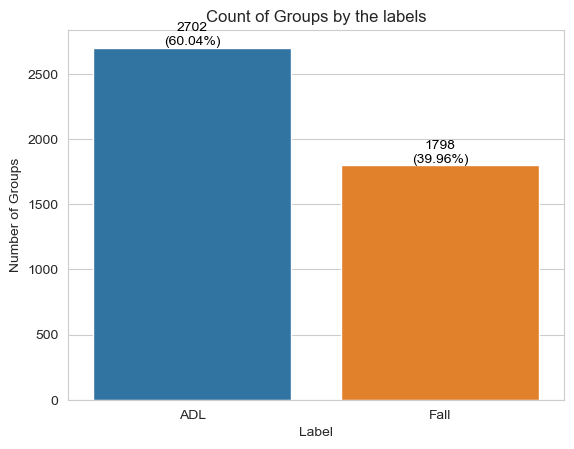

In [16]:
# Computing the mean of each group
grouped_mean = grouped.mean()

# Calculate class times and percentages
class_counts = grouped_mean['label'].value_counts()
class_percentages = (class_counts / class_counts.sum()) * 100

# Check the class distribution
ax = sns.countplot(x='label', data=grouped_mean)

# Add annotations for counts and percentages
for p, count, perc in zip(ax.patches, class_counts, class_percentages):
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(f'{count}\n({perc:.2f}%)', xy=(x, y), ha='center', va='bottom', fontsize=10, color='black')


# Set labels and title for better readability
plt.xlabel('Label')
plt.ylabel('Number of Groups')
plt.title('Count of Groups by the labels')
plt.xticks([0, 1], ['ADL', 'Fall'])  # Labeling 0 as ADL and 1 as Fall
plt.show()


- The dataset is imbalanced, with a higher proportion of non-fall groups compared to fall groups.
- The class imbalance will need to be addressed during the modeling stage (e.g., resampling, weighted loss) to ensure the model does not favor the majority class (non-falls).

Reason for Imbalance: 

The imbalance in the dataset arises because elderly participants predominantly performed Activities of Daily Living (ADLs) and avoided simulated falls due to medical conditions and physician recommendations.

As stated in the dataset description:

Elderly people between 60 and 75 years old only simulated ADLs, except for one participant (SE06) who is an expert in Judo and performed fall simulations.
Certain activities (e.g., D06, D13, D18, D19) were not performed by elderly subjects due to:
Medical recommendations from a physician specializing in sports.
Personal impairments or medical conditions.
This results in a higher number of non-fall activities (ADLs) compared to fall simulations, leading to the observed class imbalance.


In [17]:
# No. of groups
grouped.size()

subject  activity  trial
SA01     D01       R01      19999
         D02       R01      20000
         D03       R01      20000
         D04       R01      20000
         D05       R01       5000
                            ...  
SE15     D17       R01       9999
                   R02      10000
                   R03      10000
                   R04      10000
                   R05      10000
Length: 4500, dtype: int64

```
Activities of Daily Living (ADL):
 
+----+---------------------------------------------------------------------------------+------+--------+
|Code|Activity                                                                         |Trials|Duration|
+----+---------------------------------------------------------------------------------+------+--------+
|D01 |Walking slowly                                                                   | 1    | 100s   |
|D02 |Walking quickly                                                                  | 1    | 100s   |
|D03 |Jogging slowly                                                                   | 1    | 100s   |
|D04 |Jogging quickly                                                                  | 1    | 100s   |
|D05 |Walking upstairs and downstairs slowly                                           | 5    | 25s    |
|D06 |Walking upstairs and downstairs quickly                                          | 5    | 25s    |
|D07 |Slowly sit in a half height chair, wait a moment, and up slowly                  | 5    | 12s    |
|D08 |Quickly sit in a half height chair, wait a moment, and up quickly                | 5    | 12s    |
|D09 |Slowly sit in a low height chair, wait a moment, and up slowly                   | 5    | 12s    |
|D10 |Quickly sit in a low height chair, wait a moment, and up quickly                 | 5    | 12s    |
|D11 |Sitting a moment, trying to get up, and collapse into a chair                    | 5    | 12s    |
|D12 |Sitting a moment, lying slowly, wait a moment, and sit again                     | 5    | 12s    |
|D13 |Sitting a moment, lying quickly, wait a moment, and sit again                    | 5    | 12s    |
|D14 |Being on one's back change to lateral position,wait a moment,change to one's back| 5    | 12s    |
|D15 |Standing, slowly bending at knees, and getting up                                | 5    | 12s    |
|D16 |Standing, slowly bending without bending knees, and getting up                   | 5    | 12s    |
|D17 |Standing, get into a car, remain seated and get out of the car                   | 5    | 25s    |
|D18 |Stumble while walking                                                            | 5    | 12s    |
|D19 |Gently jump without falling (trying to reach a high object)                      | 5    | 12s    |
+----+---------------------------------------------------------------------------------+------+--------+

Falls:

+----+---------------------------------------------------------------------------------+------+--------+
|Code|Activity                                                                         |Trials|Duration|
+----+---------------------------------------------------------------------------------+------+--------+
|F01 |Fall forward while walking caused by a slip                                      | 5    | 15s    |
|F02 |Fall backward while walking caused by a slip                                     | 5    | 15s    |
|F03 |Lateral fall while walking caused by a slip                                      | 5    | 15s    |
|F04 |Fall forward while walking caused by a trip                                      | 5    | 15s    |
|F05 |Fall forward while jogging caused by a trip                                      | 5    | 15s    |
|F06 |Vertical fall while walking caused by fainting                                   | 5    | 15s    |
|F07 |Fall while walking,with use of hands in a table to dampen fall,caused by fainting| 5    | 15s    |
|F08 |Fall forward when trying to get up                                               | 5    | 15s    |
|F09 |Lateral fall when trying to get up                                               | 5    | 15s    |
|F10 |Fall forward when trying to sit down                                             | 5    | 15s    |
|F11 |Fall backward when trying to sit down                                            | 5    | 15s    |
|F12 |Lateral fall when trying to sit down                                             | 5    | 15s    |
|F13 |Fall forward while sitting, caused by fainting or falling asleep                 | 5    | 15s    |
|F14 |Fall backward while sitting, caused by fainting or falling asleep                | 5    | 15s    |
|F15 |Lateral fall while sitting, caused by fainting or falling asleep                 | 5    | 15s    |
+----+---------------------------------------------------------------------------------+------+--------+

```

### Pattern Trimming

**Ensure all groups have consistent time series lengths**
According to the above description, it can be seen that different activities have different lengths in time. 
- Activities D01 - D04 are recorded for 100s, which includes 20000 data rows, (200 per second)
- Activities D05, D06 and D17 are recorded for 25 seconds and have 500 data rows per sample
- ALl the Falls are recorded for 15 seconds and have 3000 data rows per sample
- All other activities are of 12 seconds only, which has only 2400 rows

If the time series lengths of groups are inconsistent, several issues can arise, particularly during modeling and preprocessing:
- Models like LSTMs and CNNs require inputs with fixed dimensions. 
- Impact on feature engineering - challenging to directly feed the data into the models.
- When aggregating group data (e.g., computing means or sums), inconsistent lengths can bias the statistics. Shorter groups will have fewer data, leading to incorrect averages.

Solution the groups of long sequences will be truncated.

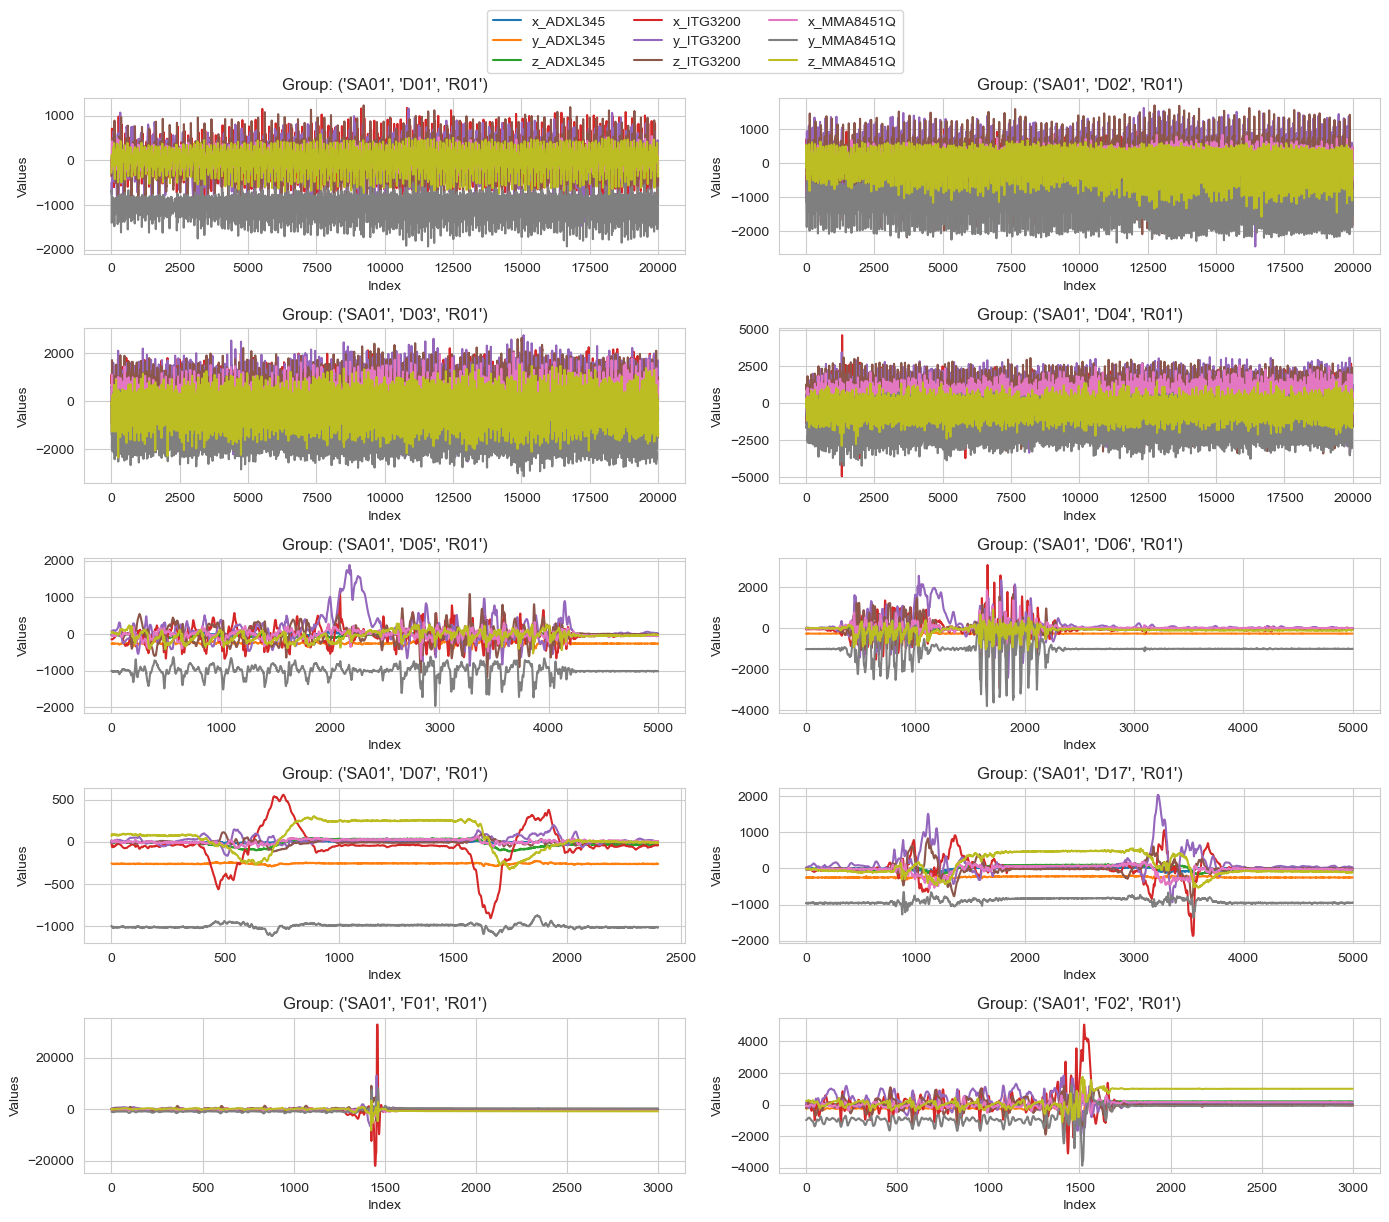

In [18]:
# To have an idea of what does data from long sequences look like one sample from each case will be printed out.

# Define the specific activities you want to plot
selected_activities = ["D01", "D02", "D03", "D04", "D05", "D06", "D07", "D17", "F01", "F02"]

# Create a list to hold one group from each activity
groups_to_plot = []

# Iterate over selected activities and pick the first matching group for each activity
for activity in selected_activities:
    for group_key in grouped.groups.keys():
        if activity in group_key:
            groups_to_plot.append(group_key)
            break  # Break after finding the first matching group for the activity

# Ensure we have only 10 groups
groups_to_plot = groups_to_plot[:10]

# Create subplots: 10 plots in a grid of 5 rows × 2 columns
fig, axes = plt.subplots(5, 2, figsize=(14, 12))
axes = axes.flatten()  # Flatten axes for easier access

# Initialize a variable to capture the legend handles and labels
handles, labels = None, None

# Plot each selected group
for i, group_key in enumerate(groups_to_plot):
    # Extract the group's data
    group_data = grouped.get_group(group_key)
    
    # Reset the index so x-values start from 0
    group_data_reset = group_data.reset_index(drop=True)
    
    # Drop identifiers and plot the remaining sensor data
    ax = axes[i]
    plot = group_data_reset.drop(['subject', 'activity', 'trial', 'label'], axis=1, errors='ignore').plot(
        ax=ax, title=f"Group: {group_key}", legend=False  # Only capture the legend once
    )
    
    # Capture the legend handles and labels (from the first plot)
    if handles is None and labels is None:
        handles, labels = ax.get_legend_handles_labels()

    ax.set_xlabel("Index")
    ax.set_ylabel("Values")

# Remove unused subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add a single legend outside the plot grid
fig.legend(handles, labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.02))

# Improve layout
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust layout to fit the legend
plt.show()


In the above figure the groups with long sequences is plotted. 
- D01 (100s - 20 000)
- D02 (100s - 20 000)
- D03 (100s - 20 000)
- D04 (100s - 20 000)
- D05 (25s - 5000)
- D06 (25s - 5000)
- D07 (12s - 2400) // lowest sequence
- D17 (25s - 5000)

**Data Trimming for Fall Detection Analysis**

During the analysis of the sensor data, it became clear that when the data was limited to 12 seconds, the patterns were much more distinct and visible. In contrast, when the data contained a longer duration (in the 100s), the patterns were less visible, and it became challenging to interpret the underlying behavior. Additionally, in these longer time frames, the patterns appeared to be more recursive, making it harder to pinpoint the specific actions.

To make the patterns clearer and to ensure consistent analysis across different activities, I will apply the following trimming strategy:

Trimming Strategy:
- For Activities D01, D02, D03, D04: Trim to the middle 12 seconds of the data.
- For Activity D05: Trim to the middle 12 seconds.
- For Activity D06: Trim to the first 12 seconds of the data.
- For Activity D17: Trim to the middle 12 seconds.
- For All Fall Activities (15 seconds): Trim to the first 12 seconds of the data.

Reasoning Behind Trimming:
- Fall activities are only 15 seconds long, and for consistency, I will keep only the first 12 seconds for all fall-related data. 
- For non-fall activities with variable durations, I chose specific trimming methods to retain the most meaningful part of the data based on the activity duration and sensor patterns.

This trimming step ensures that all data used in the analysis are of uniform length (12 seconds) and can be fairly compared without discrepancies due to varying event durations.

In [19]:
# Define the activities that need the middle 12 seconds
selected_activities_first = ["D01", "D02", "D03", "D04", "D05", "D17"]

# Define the activities that need the first 12 seconds
selected_activities_second = ["D07", "D08", "D09", "D10", "D11", "D12", "D13", "D14", 
                              "D15", "D16", "D18", "D19", "D06", "F01", "F02", "F03", 
                              "F04", "F05", "F06", "F07", "F08", "F09", "F10", "F11", 
                              "F12", "F13", "F14", "F15"]

# Create an empty list to store the filtered data for these groups
filtered_groups_first = []
filtered_groups_second = []

# Iterate over each group in 'grouped' for first set of activities
for group_key, group_data in grouped:
    # Check if the activity is one of the selected activities for the first set (middle 12 seconds)
    if any(activity in group_key for activity in selected_activities_first):
        total_rows = len(group_data)
        
        # Calculate the number of rows to trim based on the total row count
        rows_to_trim = (total_rows - 2400) // 2  # Keep 2400 rows in the middle
        
        # Trim the rows dynamically, for both even and odd row counts
        middle_12_seconds = group_data.iloc[rows_to_trim:-rows_to_trim]
        
        # Check if the number of rows is 2401 (i.e., odd number), remove the last row if necessary
        if len(middle_12_seconds) > 2400:
            middle_12_seconds = middle_12_seconds.iloc[:2400]  # Remove the last row
        
        # Append the trimmed group to the list
        filtered_groups_first.append(middle_12_seconds)

# Iterate over each group in 'grouped' for second set of activities
for group_key, group_data in grouped:
    # Check if the activity is one of the selected activities for the second set (first 12 seconds)
    if any(activity in group_key for activity in selected_activities_second):
        # Trim to keep the first 12 seconds
        first_12_seconds = group_data.iloc[:2400]
        
        # Append the trimmed group to the list
        filtered_groups_second.append(first_12_seconds)

# Concatenate the filtered groups from both sets of activities into one DataFrame
trimmed_df = pd.concat(filtered_groups_first + filtered_groups_second)

# Group the data by subject, activity, and trial
trimmed_groups = trimmed_df.groupby(['subject', 'activity', 'trial'])

# Print the size of each group after trimming to verify
print(trimmed_groups.size())

subject  activity  trial
SA01     D01       R01      2400
         D02       R01      2400
         D03       R01      2400
         D04       R01      2400
         D05       R01      2400
                            ... 
SE15     D17       R01      2400
                   R02      2400
                   R03      2400
                   R04      2400
                   R05      2400
Length: 4500, dtype: int64


In [20]:
trimmed_groups.size().unique()

array([2400, 2399, 2398, 2395, 2394, 2396, 2001, 1999, 2000], dtype=int64)

In [21]:
grouped.size().unique()

array([19999, 20000,  5000,  2400,  4999,  3000,  2999,  2399,  3001,
        3006,  5005,  2982,  2981,  4981,  5001,  2998,  2996,  2398,
        2395,  2997, 19997,  4998,  2394,  2396,  2891, 35999, 36000,
        2401,  2001,  1999,  2000,  5406,  4605,  5008,  4205,  4603,
        3204,  3205,  3607, 20001, 22006,  4606,  5011,  4806,  4206,
        3807,  4006,  5007,  3404,  3405,  3804,  2404, 19995, 19985,
       19998, 19996,  4993,  4997, 19990,  9999, 10000], dtype=int64)

According to the dataset description it says the least time an activity was recorded was 12 seconds (which should mean that the minimum size of these groups should be 2400) But for some reason some groups have different sizes which should be taken care of.

In [22]:
group_sizes = grouped.size()
group_sizes[group_sizes < 2400].unique()

array([2399, 2398, 2395, 2394, 2396, 2001, 1999, 2000], dtype=int64)

Since all these values have only minor differences (information of less than one second), these can be handled by duplicating their last row until they reach 2400 rows. This could give the meaning that the same acceleration or angular velocity has been there until the end.

In [23]:
# Function to pad groups with fewer than 2400 rows by duplicating the last row
def pad_with_last_row(group):
    current_size = len(group)
    if current_size < 2400:
        # Calculate how many rows are needed
        rows_to_add = 2400 - current_size
        # Repeat the last row as needed and concatenate
        last_row = group.iloc[[-1]]  # Select the last row as a DataFrame
        padding = pd.concat([last_row] * rows_to_add, ignore_index=True)
        # Concatenate the original group with the padding
        group = pd.concat([group, padding], ignore_index=True)
    return group

# Apply the function to all groups in the DataFrame
trimmed_df = (
    trimmed_df.groupby(['subject', 'activity', 'trial'], group_keys=False)
    .apply(pad_with_last_row)
)

# Verify that all groups now have 2400 rows
print(trimmed_df.groupby(['subject', 'activity', 'trial']).size().unique())

[2400]


In [24]:
trimmed_groups = trimmed_df.groupby(['subject', 'activity', 'trial'])
trimmed_groups.size()

subject  activity  trial
SA01     D01       R01      2400
         D02       R01      2400
         D03       R01      2400
         D04       R01      2400
         D05       R01      2400
                            ... 
SE15     D17       R01      2400
                   R02      2400
                   R03      2400
                   R04      2400
                   R05      2400
Length: 4500, dtype: int64

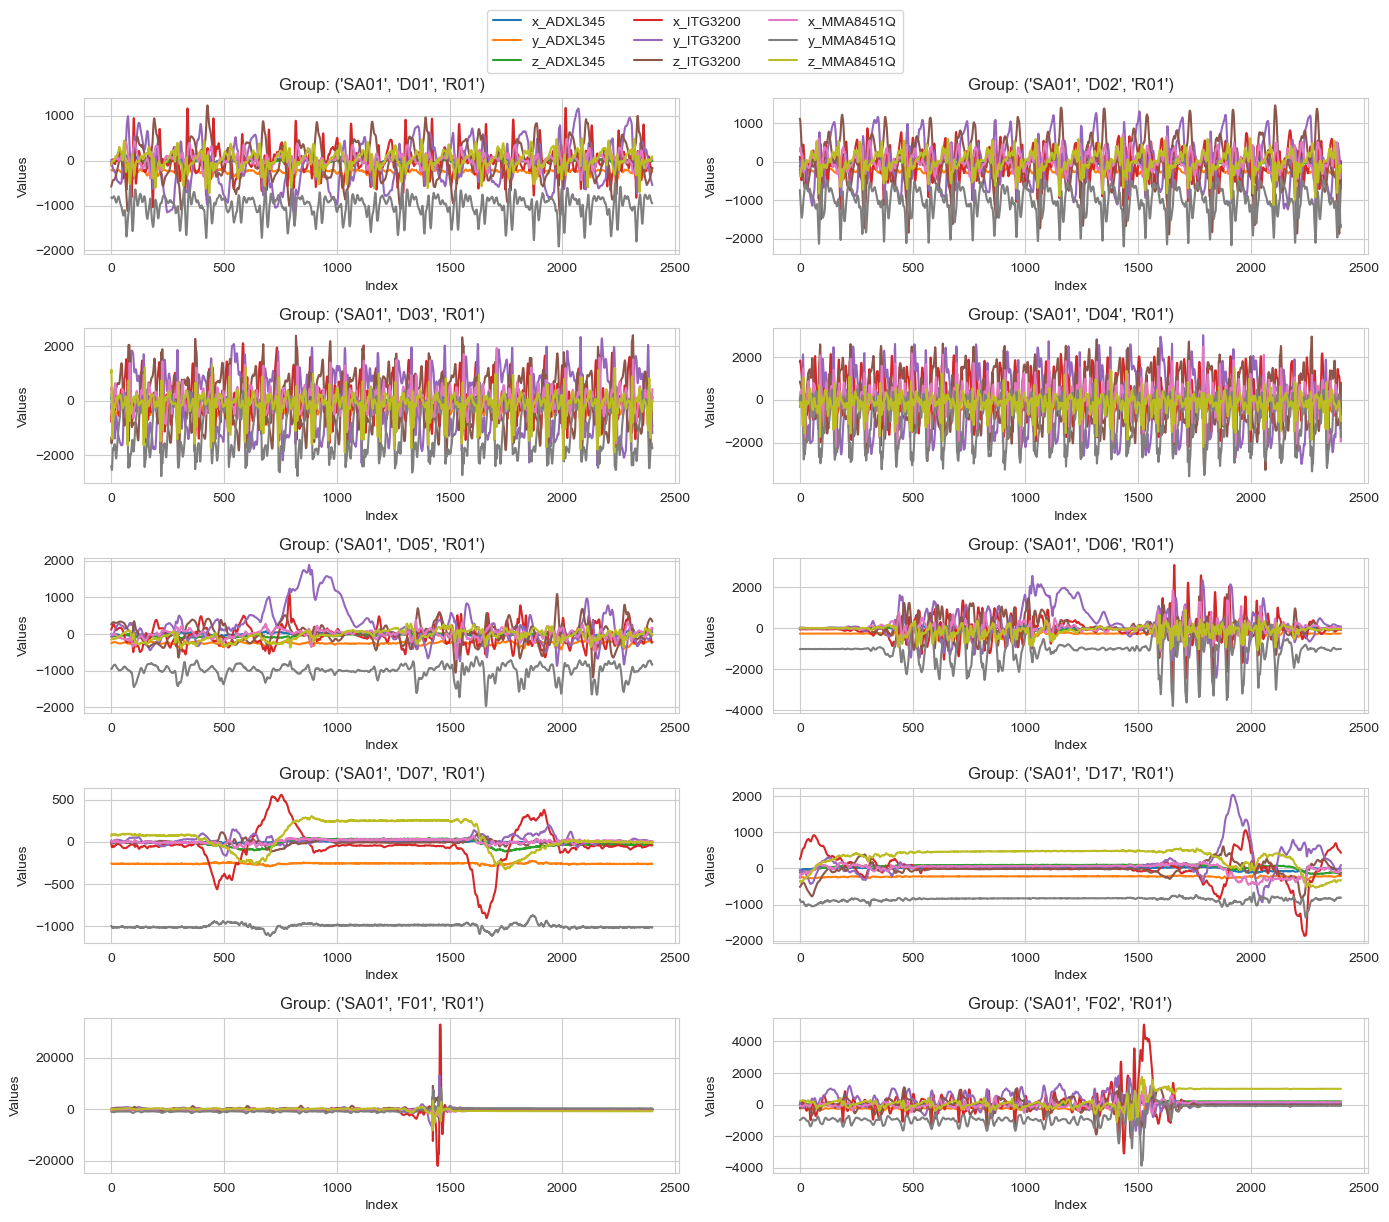

In [25]:
# To plot the trimmed group for verification

# Define the specific activities you want to plot
selected_activities = ["D01", "D02", "D03", "D04", "D05", "D06", "D07", "D17", "F01", "F02"]

# Create a list to hold one group from each activity
groups_to_plot = []

# Iterate over selected activities and pick the first matching group for each activity
for activity in selected_activities:
    for group_key in trimmed_groups.groups.keys():
        if activity in group_key:
            groups_to_plot.append(group_key)
            break  # Break after finding the first matching group for the activity

# Ensure we have only 10 groups
groups_to_plot = groups_to_plot[:10]

# Create subplots: 10 plots in a grid of 5 rows × 2 columns
fig, axes = plt.subplots(5, 2, figsize=(14, 12))
axes = axes.flatten()  # Flatten axes for easier access

# Initialize a variable to capture the legend handles and labels
handles, labels = None, None

# Plot each selected group
for i, group_key in enumerate(groups_to_plot):
    # Extract the group's data
    group_data = trimmed_groups.get_group(group_key)
    
    # Reset the index so x-values start from 0
    group_data_reset = group_data.reset_index(drop=True)
    
    # Drop identifiers and plot the remaining sensor data
    ax = axes[i]
    plot = group_data_reset.drop(['subject', 'activity', 'trial', 'label'], axis=1, errors='ignore').plot(
        ax=ax, title=f"Group: {group_key}", legend=False  # Only capture the legend once
    )
    
    # Capture the legend handles and labels (from the first plot)
    if handles is None and labels is None:
        handles, labels = ax.get_legend_handles_labels()

    ax.set_xlabel("Index")
    ax.set_ylabel("Values")

# Remove unused subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add a single legend outside the plot grid
fig.legend(handles, labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.02))

# Improve layout
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust layout to fit the legend
plt.show()


The data groups are now perfectly aligned, with all groups normalized to 2400 rows, ensuring consistency and clarity for further analysis.

### Feature Extraction

**Statistical Features**\
Statistical features summarize the time series’ distribution and variation over a period. These include:

- Mean: Average value of the data.
- Variance: Measure of data spread.
- Standard Deviation: Square root of variance; measures the dispersion.
- Skewness: Indicates asymmetry of the data distribution.
- Kurtosis: Describes the "tailedness" or sharpness of the data distribution.
- Minimum/Maximum Values: Capture range of the series.
- Percentiles (e.g., Median): Quantify thresholds at specific points in the dataset (50% = median).
- Root Mean Square (RMS): Energy-like measure of signal strength.

**Time-Domain Features**\
These focus on the structure and behavior of the series over time:
- Peaks: Number and location of local maxima.
- Zero Crossings: Number of times the signal crosses the mean or zero line.

**Frequency-Domain Features**\
These features analyze the time series in the frequency domain, which can capture periodicity and oscillations:  
- Fast Fourier Transform (FFT): Converts the time series into frequency components. Useful for identifying dominant frequencies.  
- Wavelet Transform (DWT): Decomposes time series into multi-resolution frequency bands, helping capture both frequency and temporal features.  
- Spectral Entropy: Measures signal complexity in the frequency domain.  
- Power Spectral Density (PSD): Represents signal power at various frequencies.  

**Why Use These Features?**  
- Statistical features provide global summaries.  
- Frequency-domain features are powerful for identifying periodic patterns or oscillatory behavior.  
- Time-domain features are useful for capturing localized temporal behavior.  



In [26]:
# Define the statistical functions you want to apply
statistical_features = ['mean', 'std', 'min', 'max', 'median', 'quantile']

# Select sensor data columns for aggregation
sensor_columns = ['x_ADXL345', 'y_ADXL345', 'z_ADXL345',
                  'x_ITG3200', 'y_ITG3200', 'z_ITG3200',
                  'x_MMA8451Q', 'y_MMA8451Q', 'z_MMA8451Q']

# Calculate the statistics for each group
group_stats = trimmed_groups[sensor_columns].agg(statistical_features)

# Flatten the multi-level column index after aggregation
group_stats.columns = ['_'.join(col).strip() for col in group_stats.columns.values]

# Display the resulting DataFrame with statistical features
group_stats

x_ADXL345_mean  x_ADXL345_std  x_ADXL345_min  \
subject activity trial                                                 
SA01    D01      R01          9.262500      37.994584           -113   
        D02      R01         11.330833      63.368476           -208   
        D03      R01         10.492917     120.263934           -400   
        D04      R01          8.750833     186.065817           -708   
        D05      R01          0.817917      31.461943           -180   
...                                ...            ...            ...   
SE15    D17      R01         -6.483333      11.922693            -71   
                 R02        -11.275833      10.475948           -104   
                 R03         -6.801667      10.658236            -98   
                 R04         -9.193750       7.418556            -47   
                 R05         -7.813333       9.961124            -80   

                        x_ADXL345_max  x_ADXL345_median  x_ADXL345_quantile  \
subject activity trial                                                        
SA01    D01      R01              128              10.0                10.0   
        D02      R01              190               8.0                 8.0   
        D03      R01              490              10.0                10.0   
        D04      R01              625              19.0                19.0   
        D05      R01              103               4.0                 4.0   
...                               ...               ...                 ...   
SE15    D17      R01               58              -6.0                -6.0   
                 R02               46             -11.0               -11.0   
                 R03               56              -6.0                -6.0   
                 R04               46              -9.0                -9.0   
                 R05               74              -7.0                -7.0   

                        y_ADXL345_mean  y_ADXL345_std  y_ADXL345_min  \
subject activity trial                                                 
SA01    D01      R01       -261.198333      60.972437           -499   
        D02      R01       -262.425417      93.807330           -578   
        D03      R01       -263.189167     216.471700           -724   
        D04      R01       -261.741250     262.743792           -925   
        D05      R01       -258.350000      48.224698           -517   
...                                ...            ...            ...   
SE15    D17      R01       -243.977083      23.567467           -380   
                 R02       -242.018333      24.445166           -298   
                 R03       -240.022083      25.744082           -371   
                 R04       -241.059167      23.790278           -274   
                 R05       -243.459583      23.034346           -357   

                        y_ADXL345_max  ...  y_MMA8451Q_min  y_MMA8451Q_max  \
subject activity trial                 ...                                   
SA01    D01      R01             -118  ...           -1911            -473   
        D02      R01              -85  ...           -2197            -357   
        D03      R01              113  ...           -2785             407   
        D04      R01              168  ...           -3564             637   
        D05      R01             -160  ...           -1964            -614   
...                               ...  ...             ...             ...   
SE15    D17      R01             -135  ...           -1469            -517   
                 R02             -155  ...           -1111            -592   
                 R03             -193  ...           -1421            -742   
                 R04             -167  ...           -1060            -642   
                 R05             -200  ...           -1389            -784   

                        y_MMA8451Q_median  y_MMA8451Q_quantile  \
subject activity trial                   

In [27]:
# Define time-domain features (peaks and zero crossings)
def time_domain_features(x):
    peaks, _ = find_peaks(x)  # Find peaks
    zero_crossings = ((x[:-1] * x[1:]) < 0).sum()  # Count zero crossings
    return {
        'num_peaks': len(peaks),
        'num_zero_crossings': zero_crossings
    }

# Select sensor data columns for aggregation
sensor_columns = ['x_ADXL345', 'y_ADXL345', 'z_ADXL345',
                  'x_ITG3200', 'y_ITG3200', 'z_ITG3200',
                  'x_MMA8451Q', 'y_MMA8451Q', 'z_MMA8451Q']

# Apply the aggregation function for time-domain features to the grouped data
time_domain_stats = trimmed_groups[sensor_columns].agg(time_domain_features)

# Flatten the multi-level column index to create single-level column names
time_domain_stats.columns = ['_'.join(col) for col in time_domain_stats.columns]

# Reset the index to convert the result into a flat DataFrame
time_domain_stats = time_domain_stats.reset_index()

# Show the results
time_domain_stats

,subject,activity,trial,x___A_D_X_L_3_4_5,y___A_D_X_L_3_4_5,z___A_D_X_L_3_4_5,x___I_T_G_3_2_0_0,y___I_T_G_3_2_0_0,z___I_T_G_3_2_0_0,x___M_M_A_8_4_5_1_Q,y___M_M_A_8_4_5_1_Q,z___M_M_A_8_4_5_1_Q
0,SA01,D01,R01,"{'num_peaks': 360, 'num_zero_crossings': 0}","{'num_peaks': 234, 'num_zero_crossings': 0}","{'num_peaks': 331, 'num_zero_crossings': 0}","{'num_peaks': 139, 'num_zero_crossings': 0}","{'num_peaks': 113, 'num_zero_crossings': 0}","{'num_peaks': 76, 'num_zero_crossings': 0}","{'num_peaks': 289, 'num_zero_crossings': 0}","{'num_peaks': 167, 'num_zero_crossings': 0}","{'num_peaks': 218, 'num_zero_crossings': 0}"
1,SA01,D02,R01,"{'num_peaks': 259, 'num_zero_crossings': 0}","{'num_peaks': 198, 'num_zero_crossings': 0}","{'num_peaks': 314, 'num_zero_crossings': 0}","{'num_peaks': 139, 'num_zero_crossings': 0}","{'num_peaks': 107, 'num_zero_crossings': 0}","{'num_peaks': 97, 'num_zero_crossings': 0}","{'num_peaks': 235, 'num_zero_crossings': 0}","{'num_peaks': 168, 'num_zero_crossings': 0}","{'num_peaks': 243, 'num_zero_crossings': 0}"
2,SA01,D03,R01,"{'num_peaks': 166, 'num_zero_crossings': 0}","{'num_peaks': 169, 'num_zero_crossings': 0}","{'num_peaks': 262, 'num_zero_crossings': 0}","{'num_peaks': 154, 'num_zero_crossings': 0}","{'num_peaks': 154, 'num_zero_crossings': 0}","{'num_peaks': 137, 'num_zero_crossings': 0}","{'num_peaks': 157, 'num_zero_crossings': 0}","{'num_peaks': 178, 'num_zero_crossings': 0}","{'num_peaks': 230, 'num_zero_crossings': 0}"
3,SA01,D04,R01,"{'num_peaks': 188, 'num_zero_crossings': 0}","{'num_peaks': 188, 'num_zero_crossings': 0}","{'num_peaks': 281, 'num_zero_crossings': 0}","{'num_peaks': 161, 'num_zero_crossings': 0}","{'num_peaks': 167, 'num_zero_crossings': 0}","{'num_peaks': 153, 'num_zero_crossings': 0}","{'num_peaks': 170, 'num_zero_crossings': 0}","{'num_peaks': 194, 'num_zero_crossings': 0}","{'num_peaks': 268, 'num_zero_crossings': 0}"
4,SA01,D05,R01,"{'num_peaks': 407, 'num_zero_crossings': 0}","{'num_peaks': 363, 'num_zero_crossings': 0}","{'num_peaks': 506, 'num_zero_crossings': 0}","{'num_peaks': 114, 'num_zero_crossings': 0}","{'num_peaks': 86, 'num_zero_crossings': 0}","{'num_peaks': 68, 'num_zero_crossings': 0}","{'num_peaks': 272, 'num_zero_crossings': 0}","{'num_peaks': 233, 'num_zero_crossings': 0}","{'num_peaks': 312, 'num_zero_crossings': 0}"
...,...,...,...,...,...,...,...,...,...,...,...,...
4495,SE15,D17,R01,"{'num_peaks': 642, 'num_zero_crossings': 0}","{'num_peaks': 666, 'num_zero_crossings': 0}","{'num_peaks': 690, 'num_zero_crossings': 0}","{'num_peaks': 221, 'num_zero_crossings': 0}","{'num_peaks': 242, 'num_zero_crossings': 0}","{'num_peaks': 357, 'num_zero_crossings': 0}","{'num_peaks': 680, 'num_zero_crossings': 0}","{'num_peaks': 647, 'num_zero_crossings': 0}","{'num_peaks': 659, 'num_zero_crossings': 0}"
4496,SE15,D17,R02,"{'num_peaks': 665, 'num_zero_crossings': 0}","{'num_peaks': 671, 'num_zero_crossings': 0}","{'num_peaks': 715, 'num_zero_crossings': 0}","{'num_peaks': 223, 'num_zero_crossings': 0}","{'num_peaks': 271, 'num_zero_crossings': 0}","{'num_peaks': 364, 'num_zero_crossings': 0}","{'num_peaks': 674, 'num_zero_crossings': 0}","{'num_peaks': 695, 'num_zero_crossings': 0}","{'num_peaks': 658, 'num_zero_crossings': 0}"
4497,SE15,D17,R03,"{'num_peaks': 682, 'num_zero_crossings': 0}","{'num_peaks': 690, 'num_zero_crossings': 0}","{'num_peaks': 723, 'num_zero_crossings': 0}","{'num_peaks': 229, 'num_zero_crossings': 0}","{'num_peaks': 284, 'num_zero_crossings': 0}","{'num_peaks': 407, 'num_zero_crossings': 0}","{'num_peaks': 643, 'num_zero_crossings': 0}","{'num_peaks': 700, 'num_zero_crossings': 0}","{'num_peaks': 672, 'num_zero_crossings': 0}"
4498,SE15,D17,R04,"{'num_peaks': 689, 'num_zero_crossings': 0}","{'num_peaks': 681, 'num_zero_crossings': 0}","{'num_peaks': 715, 'num_zero_crossings': 0}","{'num_peaks': 249, 'num_zero_crossings': 0}","{'num_peaks': 344, 'num_zero_crossings': 0}","{'num_peaks': 429, 'num_zero_crossings': 0}","{'num_peaks': 705, 'num_

In [28]:
# Define frequency-domain features
def frequency_domain_features(x):
    fft = np.fft.fft(x)  # Fast Fourier Transform
    psd = np.abs(fft) ** 2  # Power Spectral Density
    dominant_frequency = np.argmax(psd[:len(psd) // 2])  # Dominant frequency in the first half
    spectral_entropy = entropy(psd)  # Spectral entropy
    freqs, psd_welch = welch(x)  # Power Spectral Density using Welch's method
    return {
        'dominant_frequency': dominant_frequency,
        'spectral_entropy': spectral_entropy,
        'mean_psd': psd_welch.mean(),
        'max_psd': psd_welch.max()
    }

# Select sensor data columns for aggregation
sensor_columns = ['x_ADXL345', 'y_ADXL345', 'z_ADXL345',
                  'x_ITG3200', 'y_ITG3200', 'z_ITG3200',
                  'x_MMA8451Q', 'y_MMA8451Q', 'z_MMA8451Q']

# Apply the aggregation function for frequency-domain features to the grouped data
frequency_domain_stats = trimmed_groups[sensor_columns].agg(frequency_domain_features)

# Flatten the multi-level column index to create single-level column names
frequency_domain_stats.columns = ['_'.join(col) for col in frequency_domain_stats.columns]

# Reset the index to convert the result into a flat DataFrame
frequency_domain_stats = frequency_domain_stats.reset_index()

# Show the results
frequency_domain_stats

,subject,activity,trial,x___A_D_X_L_3_4_5,y___A_D_X_L_3_4_5,z___A_D_X_L_3_4_5,x___I_T_G_3_2_0_0,y___I_T_G_3_2_0_0,z___I_T_G_3_2_0_0,x___M_M_A_8_4_5_1_Q,y___M_M_A_8_4_5_1_Q,z___M_M_A_8_4_5_1_Q
0,SA01,D01,R01,"{'dominant_frequency': 10, 'spectral_entropy':...","{'dominant_frequency': 0, 'spectral_entropy': ...","{'dominant_frequency': 0, 'spectral_entropy': ...","{'dominant_frequency': 40, 'spectral_entropy':...","{'dominant_frequency': 10, 'spectral_entropy':...","{'dominant_frequency': 30, 'spectral_entropy':...","{'dominant_frequency': 10, 'spectral_entropy':...","{'dominant_frequency': 0, 'spectral_entropy': ...","{'dominant_frequency': 20, 'spectral_entropy':..."
1,SA01,D02,R01,"{'dominant_frequency': 38, 'spectral_entropy':...","{'dominant_frequency': 0, 'spectral_entropy': ...","{'dominant_frequency': 0, 'spectral_entropy': ...","{'dominant_frequency': 50, 'spectral_entropy':...","{'dominant_frequency': 38, 'spectral_entropy':...","{'dominant_frequency': 38, 'spectral_entropy':...","{'dominant_frequency': 38, 'spectral_entropy':...","{'dominant_frequency': 0, 'spectral_entropy': ...","{'dominant_frequency': 25, 'spectral_entropy':..."
2,SA01,D03,R01,"{'dominant_frequency': 81, 'spectral_entropy':...","{'dominant_frequency': 0, 'spectral_entropy': ...","{'dominant_frequency': 0, 'spectral_entropy': ...","{'dominant_frequency': 32, 'spectral_entropy':...","{'dominant_frequency': 16, 'spectral_entropy':...","{'dominant_frequency': 48, 'spectral_entropy':...","{'dominant_frequency': 81, 'spectral_entropy':...","{'dominant_frequency': 0, 'spectral_entropy': ...","{'dominant_frequency': 0, 'spectral_entropy': ..."
3,SA01,D04,R01,"{'dominant_frequency': 88, 'spectral_entropy':...","{'dominant_frequency': 0, 'spectral_entropy': ...","{'dominant_frequency': 0, 'spectral_entropy': ...","{'dominant_frequency': 70, 'spectral_entropy':...","{'dominant_frequency': 18, 'spectral_entropy':...","{'dominant_frequency': 53, 'spectral_entropy':...","{'dominant_frequency': 88, 'spectral_entropy':...","{'dominant_frequency': 0, 'spectral_entropy': ...","{'dominant_frequency': 0, 'spectral_entropy': ..."
4,SA01,D05,R01,"{'dominant_frequency': 7, 'spectral_entropy': ...","{'dominant_frequency': 0, 'spectral_entropy': ...","{'dominant_frequency': 0, 'spectral_entropy': ...","{'dominant_frequency': 12, 'spectral_entropy':...","{'dominant_frequency': 0, 'spectral_entropy': ...","{'dominant_frequency': 23, 'spectral_entropy':...","{'dominant_frequency': 7, 'spectral_entropy': ...","{'dominant_frequency': 0, 'spectral_entropy': ...","{'dominant_frequency': 1, 'spectral_entropy': ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
4495,SE15,D17,R01,"{'dominant_frequency': 0, 'spectral_entropy': ...","{'dominant_frequency': 0, 'spectral_entropy': ...","{'dominant_frequency': 0, 'spectral_entropy': ...","{'dominant_frequency': 0, 'spectral_entropy': ...","{'dominant_frequency': 2, 'spectral_entropy': ...","{'dominant_frequency': 0, 'spectral_entropy': ...","{'dominant_frequency': 1, 'spectral_entropy': ...","{'dominant_frequency': 0, 'spectral_entropy': ...","{'dominant_frequency': 0, 'spectral_entropy': ..."
4496,SE15,D17,R02,"{'dominant_frequency': 0, 'spectral_entropy': ...","{'dominant_frequency': 0, 'spectral_entropy': ...","{'dominant_frequency': 0, 'spectral_entropy': ...","{'dominant_frequency': 0, 'spectral_entropy': ...","{'dominant_frequency': 1, 'spectral_entropy': ...","{'dominant_frequency': 0, 'spectral_entropy': ...","{'dominant_frequency': 0, 'spectral_entropy': ...","{'dominant_frequency': 0, 'spectral_entropy': ...","{'dominant_frequency': 0, 'spectral_entropy': ..."
4497,SE15,D17,R03,"{'dominant_frequency': 0, 'spectral_entropy': ...","{'dominant_frequency': 0, 'spectral_entropy': ...","{'dominant_frequency': 0, 'spectral_entropy': ...","{'dominant_frequency': 0, 'spectral_entropy': ...","{'dominant_frequency': 1, 'spectral_entropy': ...","{'dominant_frequency': 0, 'spectral_entropy': ...","{'dominant_frequency': 1, 'spectral_en

Explanation
- FFT (Fast Fourier Transform): Captures dominant frequencies by analyzing power spectral density (PSD).
- Power Spectral Density (PSD): Welch's method provides a smoother PSD estimate.
- Spectral Entropy: Measures complexity and disorder in the frequency domain.
- Dominant Frequency: Identifies the most significant frequency in the signal.

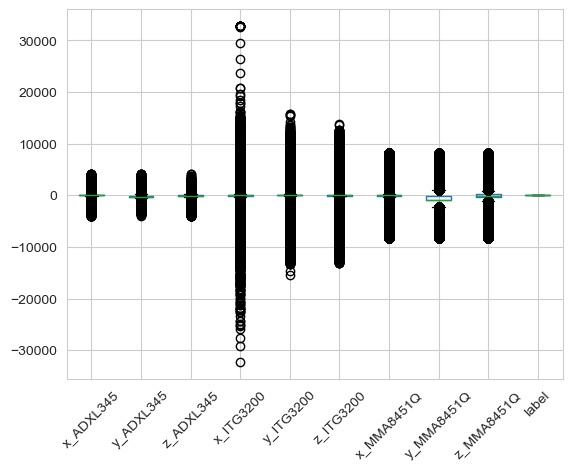

In [29]:
#### Check for Outliers
df.boxplot()

# Rotate x-axis labels
plt.xticks(rotation=45)

plt.show()

### Handling Outliers

Outliers in sensor data, such as sudden changes in acceleration or angular velocity, are critical for fall detection as they often signify the sharp movements associated with falls. Instead of being treated as noise or errors, these outliers are considered key indicators of potential fall events. For instance:

- **Acceleration spikes**: Represent sudden and high-impact movements during a fall.
- **Angular velocity changes**: Depict rotational motions or body twists common in falls.

To leverage these outliers effectively:
- Threshold-based detection identifies potential falls when sensor values exceed predefined limits.
- Temporal patterns are analyzed to distinguish meaningful outliers from noise, focusing on bursts of activity over short time windows.
- These outliers are retained as essential features for training machine learning models to classify falls accurately.

This approach ensures that critical fall events are captured and not inadvertently removed during preprocessing.

### Feature Scaling

Since the dataset involves sensor data (accelerometer, gyroscope), where measurements can have different ranges and scales, standardization (Z-score scaling) is likely the better choice for feature scaling.

- Sensor Data Variability: The axes from accelerometers and gyroscopes often have different units and magnitudes. Standardization will make each feature (axis data from each sensor) contribute equally to the model, preventing features with larger values from dominating the model's learning process.
- Handling Outliers: Standardization is less sensitive to outliers compared to Min-Max scaling. In sensor data, extreme values might be present due to noise, and using Min-Max scaling could distort your features if there are outliers. Standardization reduces this effect.
- Model Compatibility: Many machine learning algorithms, such as SVMs, K-Means, and gradient-based models, perform better when the features are standardized.



In [30]:
# List of numerical sensor data columns
sensor_data_columns = ['x_ADXL345', 'y_ADXL345', 'z_ADXL345', 'x_ITG3200', 'y_ITG3200', 'z_ITG3200', 'x_MMA8451Q', 'y_MMA8451Q', 'z_MMA8451Q']

# Extracting the sensor data for scaling
X_sensor_data = trimmed_df[sensor_data_columns]

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply the standardization
X_scaled = scaler.fit_transform(X_sensor_data)

# Create a new DataFrame with the scaled data
scaled_df = trimmed_df.copy()
scaled_df[sensor_data_columns] = X_scaled

In [31]:
scaled_df.head()

,subject,activity,trial,x_ADXL345,y_ADXL345,z_ADXL345,x_ITG3200,y_ITG3200,z_ITG3200,x_MMA8451Q,y_MMA8451Q,z_MMA8451Q,label
8799,SA01,D01,R01,-0.194006,-0.281503,-0.257021,-0.201256,-0.050176,-1.654279,-0.179067,-0.269400,-0.121509,0
8800,SA01,D01,R01,-0.138024,-0.325718,-0.232915,-0.213498,-0.107791,-1.597024,-0.147887,-0.284545,-0.077826,0
8801,SA01,D01,R01,-0.147355,-0.303610,-0.192739,-0.199216,-0.158759,-1.536907,-0.090326,-0.295904,-0.040099,0
8802,SA01,D01,R01,-0.100703,-0.310980,-0.152563,-0.160450,-0.207511,-1.468201,-0.071139,-0.301583,-0.016271,0
8803,SA01,D01,R01,-0.100703,-0.310980,-0.152563,-0.101281,-0.265127,-1.405220,-0.037561,-0.295904,0.015498,0


In [32]:
scaled_groups = scaled_df.groupby(['subject', 'activity', 'trial'])

In [33]:
# # Define the columns to plot
# columns_to_plot = ['x_ADXL345', 'y_ADXL345', 'z_ADXL345', 'x_ITG3200', 'y_ITG3200', 'z_ITG3200', 'x_MMA8451Q', 'y_MMA8451Q', 'z_MMA8451Q']
# 
# # Create a figure with 36 subplots (3 columns x 12 rows)
# fig, axes = plt.subplots(12, 3, figsize=(18, 36))
# axes = axes.flatten()  # Flatten axes array for easier indexing
# 
# # Loop through each group in scaled_groups
# for i, (group_key, group) in enumerate(scaled_groups):
#     subject, activity, trial = group_key
#     
#     # Pick the last sample of the current activity
#     last_sample = group.iloc[-1]
#     
#     # Plot the time series for the last sample (using index as time axis)
#     for col in columns_to_plot:
#         axes[i].plot(group.index, group[col], label=col)  # Plot entire time series for the last sample
#     
#     # Set subplot title and labels
#     axes[i].set_title(f"Subject: {subject}, Activity: {activity}, Trial: {trial}")
#     axes[i].set_xlabel("Time")
#     axes[i].set_ylabel("Value")
#     axes[i].legend(fontsize=8, loc='upper right')
# 
# # Hide unused subplots (if any)
# for j in range(i + 1, len(axes)):
#     axes[j].axis('off')
# 
# # Adjust layout to avoid overlap
# plt.tight_layout()
# plt.show()

In [34]:
scaled_groups.head()

,subject,activity,trial,x_ADXL345,y_ADXL345,z_ADXL345,x_ITG3200,y_ITG3200,z_ITG3200,x_MMA8451Q,y_MMA8451Q,z_MMA8451Q,label
8799,SA01,D01,R01,-0.194006,-0.281503,-0.257021,-0.201256,-0.050176,-1.654279,-0.179067,-0.269400,-0.121509,0
8800,SA01,D01,R01,-0.138024,-0.325718,-0.232915,-0.213498,-0.107791,-1.597024,-0.147887,-0.284545,-0.077826,0
8801,SA01,D01,R01,-0.147355,-0.303610,-0.192739,-0.199216,-0.158759,-1.536907,-0.090326,-0.295904,-0.040099,0
8802,SA01,D01,R01,-0.100703,-0.310980,-0.152563,-0.160450,-0.207511,-1.468201,-0.071139,-0.301583,-0.016271,0
8803,SA01,D01,R01,-0.100703,-0.310980,-0.152563,-0.101281,-0.265127,-1.405220,-0.037561,-0.295904,0.015498,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7609600,SE15,D17,R05,0.235188,-0.871040,0.233127,-1.249973,-4.912072,-0.011062,0.362971,-0.863846,0.065139,0
7609601,SE15,D17,R05,0.011261,-1.011055,0.281338,-1.360149,-4.774680,-0.025375,0.135123,-1.003939,0.124708,0
7609602,SE15,D17,R05,-0.147355,-1.158439,0.321514,-1.303021,-4.703768,-0.002473,-0.059147,-1.109955,0.150521,0
7609603,SE15,D17,R05,-0.380613,-1.217392,0.353655,-1.170401,-4.679392,0.008978,-0.217441,-1.219757,0.172362,0


### Feature Engineering

Creating a unique column (index) from multiple columns (subject, trial and activity)

In [35]:
# Create a new index column by concatenating 'subject', 'trial', and 'activity'
scaled_df['index'] = scaled_df['subject'].astype(str) + '_' + scaled_df['trial'].astype(str) + '_' + scaled_df['activity']

# Check the result
print(scaled_df[['subject', 'trial', 'activity', 'index']].head())

# Drop the 'subject', 'trial', and 'activity' columns
scaled_df = scaled_df.drop(['subject', 'trial', 'activity'], axis=1)

     subject trial activity         index
8799    SA01   R01      D01  SA01_R01_D01
8800    SA01   R01      D01  SA01_R01_D01
8801    SA01   R01      D01  SA01_R01_D01
8802    SA01   R01      D01  SA01_R01_D01
8803    SA01   R01      D01  SA01_R01_D01


In [36]:
# Check the result
print(scaled_df.columns)

Index(['x_ADXL345', 'y_ADXL345', 'z_ADXL345', 'x_ITG3200', 'y_ITG3200',
       'z_ITG3200', 'x_MMA8451Q', 'y_MMA8451Q', 'z_MMA8451Q', 'label',
       'index'],
      dtype='object')


In [37]:
scaled_groups = scaled_df.groupby('index')
scaled_groups.size()

index
SA01_R01_D01    2400
SA01_R01_D02    2400
SA01_R01_D03    2400
SA01_R01_D04    2400
SA01_R01_D05    2400
                ... 
SE15_R05_D12    2400
SE15_R05_D14    2400
SE15_R05_D15    2400
SE15_R05_D16    2400
SE15_R05_D17    2400
Length: 4500, dtype: int64

In [41]:
# Initialize an empty list to store the rows for the new DataFrame
data_rows = []

# Iterate through the grouped data
for group_name, group_data in scaled_groups:
    # Create a dictionary for each group with 'index', 'label', and the sensor data as arrays
    row_data = {
        'index': group_name,
        'label': group_data['label'].iloc[0]  # 'label' is consistent within the group
    }
    
    # Loop through each sensor column and store its values as an array for the current group
    for col in ['x_ADXL345', 'y_ADXL345', 'z_ADXL345', 'x_ITG3200', 'y_ITG3200', 'z_ITG3200', 'x_MMA8451Q', 'y_MMA8451Q', 'z_MMA8451Q']:
        row_data[col] = group_data[col].values  # Store the column values as a numpy array
    
    # Append the row data to the list
    data_rows.append(row_data)

# Create the new DataFrame
new_df = pd.DataFrame(data_rows)
new_df.head()

,index,label,x_ADXL345,y_ADXL345,z_ADXL345,x_ITG3200,y_ITG3200,z_ITG3200,x_MMA8451Q,y_MMA8451Q,z_MMA8451Q
0,SA01_R01_D01,0,"[-0.194006386561257, -0.13802444735104316, -0....","[-0.2815026730216309, -0.3257179387132108, -0....","[-0.2570206543207932, -0.23291503710562664, -0...","[-0.20125612439008211, -0.2134979541117217, -0...","[-0.05017557572296008, -0.10779148676226347, -...","[-1.6542792546886211, -1.5970242889448436, -1....","[-0.17906650574982322, -0.1478873721126243, -0...","[-0.26939971440949906, -0.284544851014981, -0....","[-0.12150927356467431, -0.07782564616549618, -..."
1,SA01_R01_D02,0,"[0.6737136711970577, 0.7576865800123784, 0.906...","[-0.14148766499829465, -0.2962410949188242, -0...","[-0.7873442330544573, -0.8194850560080127, -0....","[0.2965782842899275, 0.19864364651681085, 0.01...","[-0.7592944808220786, -0.7725904602926872, -0....","[3.2209810783940345, 3.163726112650257, 3.0377...","[0.6867540514062382, 0.7635026880516509, 0.873...","[-0.10469635382488267, -0.2675065723338138, -0...","[-0.6417415635003411, -0.6874108103267546, -0...."
2,SA01_R01_D03,0,"[0.9722840136515315, 1.1215691848787686, 0.636...","[-3.3249867947920455, -3.3692020604836252, -3....","[2.2258579188413616, 2.1053298327655288, 0.755...","[-1.562139528445682, -1.1336754881882967, -0.6...","[-0.3493351138116507, -0.7969664226554694, -0....","[-3.8786346738343775, -4.425419596687453, -4.4...","[0.9817566235120431, 1.1976121640772661, 0.729...","[-3.2870681830517805, -3.336289877019597, -3.4...","[2.0864995295210567, 2.3267594802165363, 1.200..."
3,SA01_R01_D04,0,"[0.4217949447510953, 0.6457227015919508, 0.841...","[0.6691255393473363, 0.882832656856639, 1.0891...","[-0.30523188875112633, -0.48200641499568103, -...","[3.6283962735295, 3.7630564004675353, 3.724290...","[0.08721621213999414, -0.2230233088408702, -0....","[2.4566272857146045, 2.3592938439501827, 2.244...","[0.3965482690907717, 0.6627701024545468, 0.825...","[0.6544536185249008, 0.8570198206232221, 1.072...","[-0.13342299012808653, -0.3002150220158576, -0..."
4,SA01_R01_D05,0,"[0.029921370279598382, 0.029921370279598382, 0...","[-0.5541634781197068, -0.5467942671711101, -0....","[-0.38558394613501484, -0.38558394613501484, -...","[0.2680140149394351, 0.3067798090579605, 0.347...","[-0.23853528488991343, -0.23410329173304395, -...","[0.7561548031244122, 0.7933705308578676, 0.824...","[0.04638261439607645, 0.05357779908158389, 0.0...","[-0.5174013263242662, -0.5192944683999514, -0....","[-0.24263205862603185, -0.232703961489855, -0...."


In [42]:
new_df.shape

(4500, 11)

### Splitting Train Test Datasets

In [43]:
# Separate features (X) and target (y)
X = new_df.drop(columns=['label', 'index'])  # Drop label and index columns for features
y = new_df['label']  # Label column as target

# Split the data into training and test sets (80% train, 20% test by default)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optional: If you want to keep the index, add it back
X_train['index'] = new_df.loc[X_train.index, 'index']
X_test['index'] = new_df.loc[X_test.index, 'index']

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(3600, 10) (900, 10)
(3600,) (900,)
